In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [7]:
heart_disease = pd.read_csv('heart.csv')

In [8]:
heart_disease.shape

(1025, 14)

In [9]:
heart_disease.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [10]:
heart_disease.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

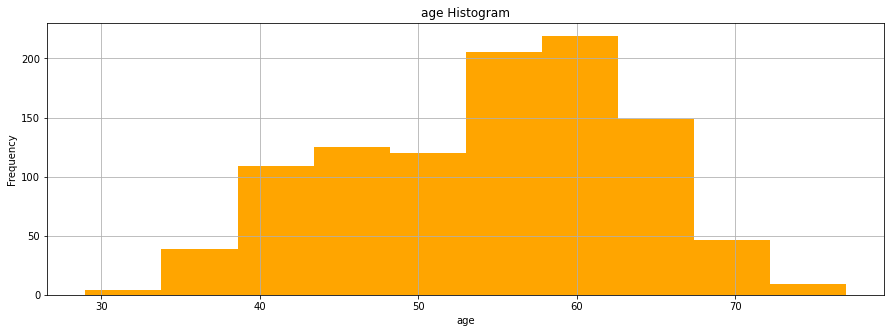

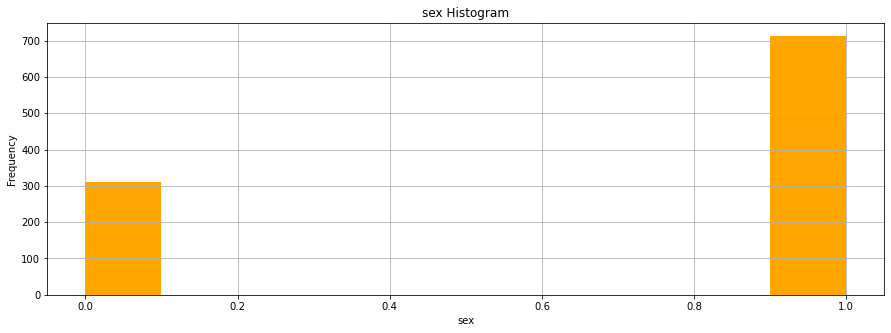

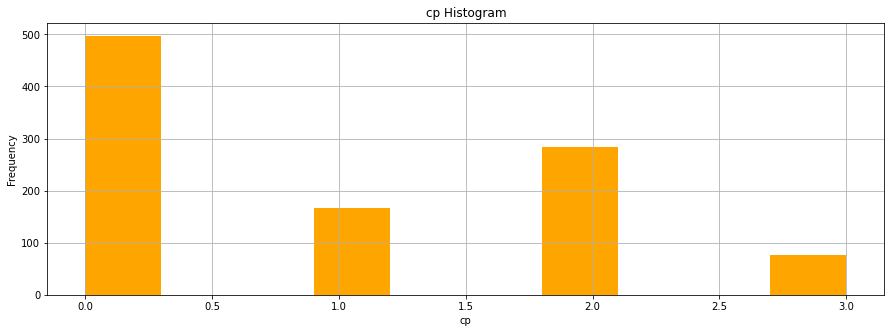

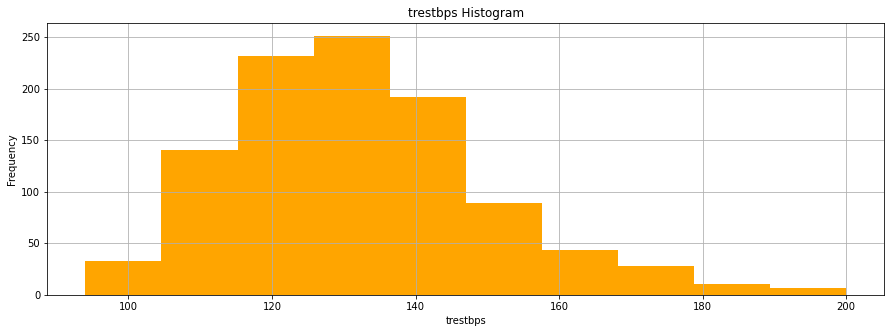

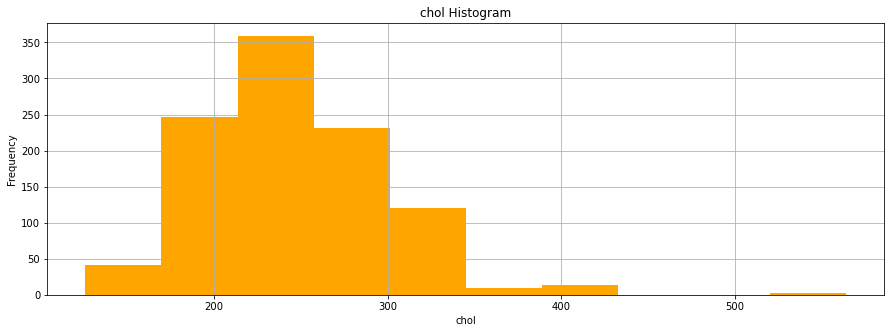

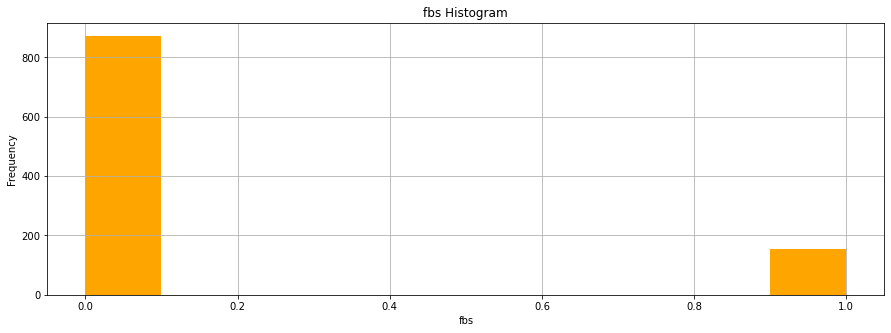

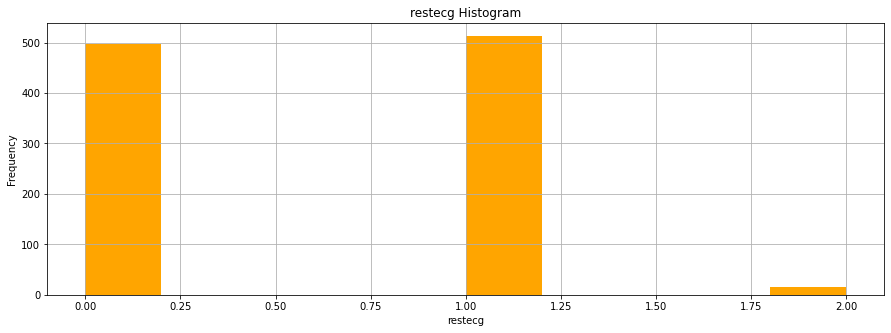

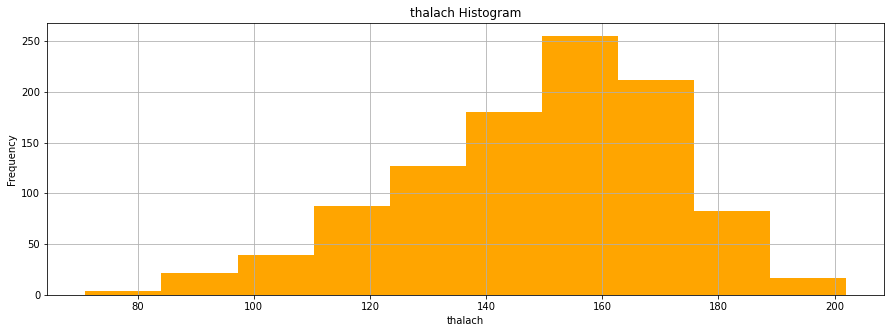

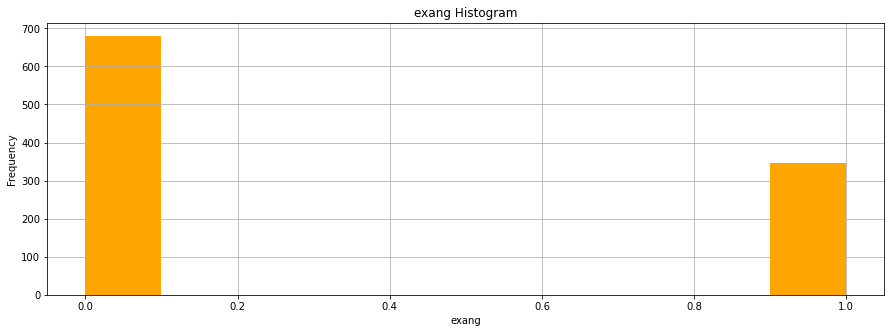

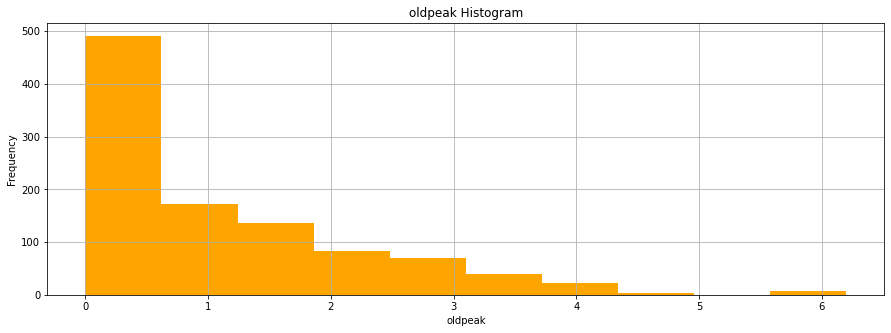

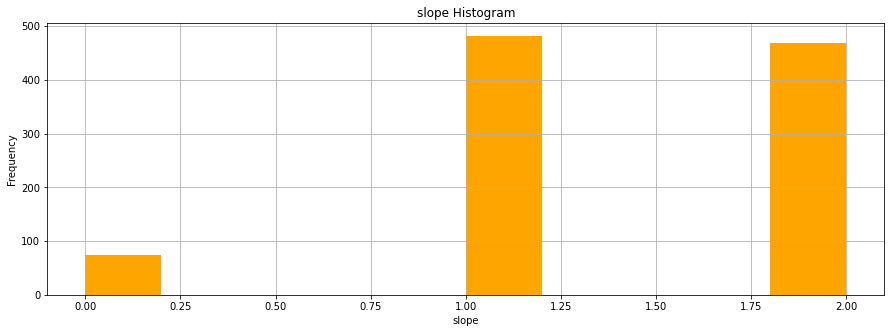

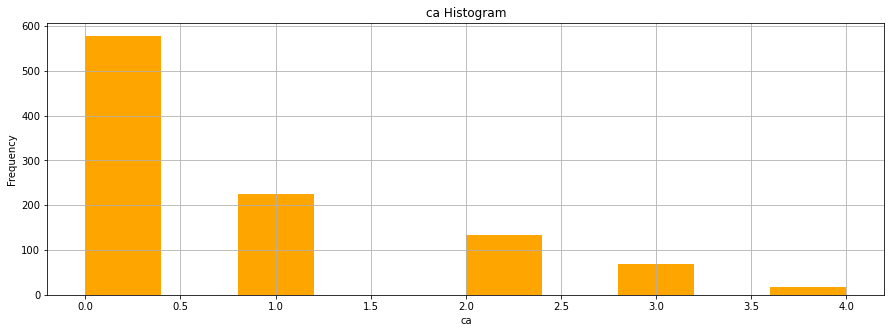

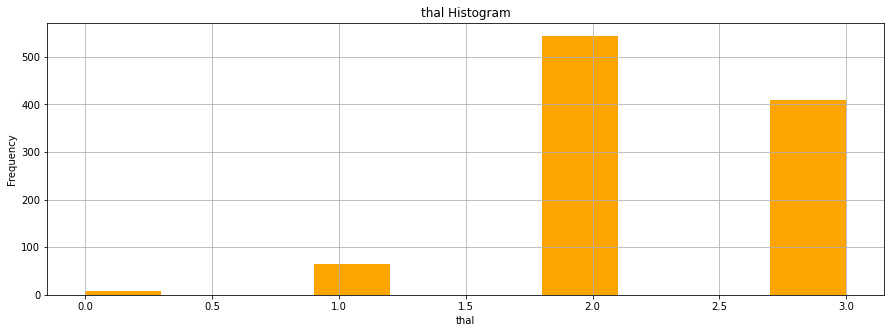

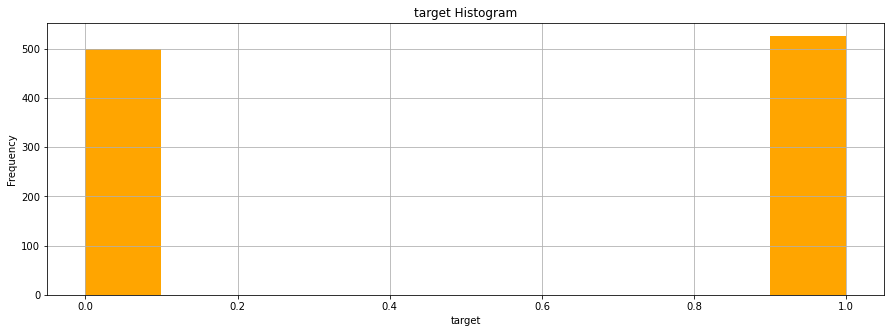

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_distribution(df):
    nGraphPerRow = 3
    numeric_cols = df.select_dtypes(include=['number']).columns

    num_graphs = 0

    for col in numeric_cols:
        plt.figure(figsize=(15, 5))
        df[col].hist(color='orange') 
        plt.title(f'{col} Histogram')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()
        num_graphs += 1
        if num_graphs >= 14:
            break
            
plot_distribution(heart_disease)


In [19]:
import matplotlib.pyplot as plt

def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') 
    
    df = df[[col for col in df if df[col].nunique() > 1]] 
    
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    
    corr = df.corr()
    
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    
    plt.title(f'Correlation Matrix for heart_disease', fontsize=15)
    
    for (i, j), val in np.ndenumerate(corr):
        plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')
    
    plt.show()


C:\Users\parth\AppData\Local\Temp/ipykernel_21940/34259819.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns')


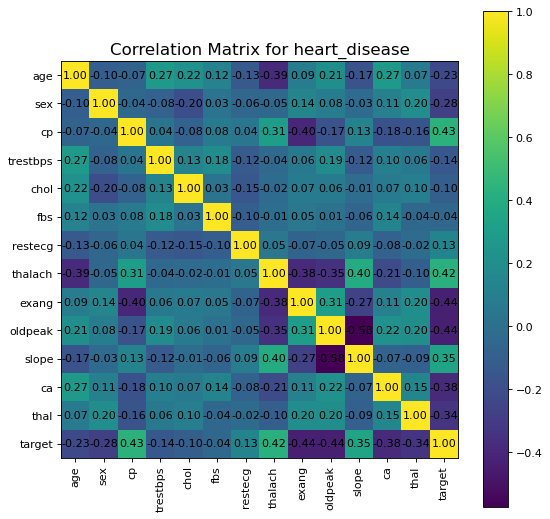

In [13]:
plotCorrelationMatrix(heart_disease, 8)